# Color Threshold, Blue Screen

### Import resources

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [82]:
# Read in the image
image = cv2.imread('images/pizza_bluescreen.jpg')

# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)


This image is: <class 'numpy.ndarray'>  with dimensions: (514, 816, 3)


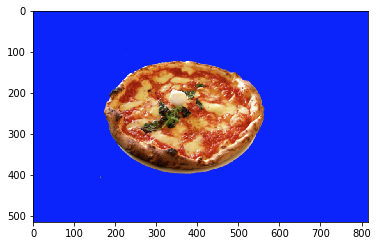

In [83]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)


### Define the color threshold

In [84]:
## TODO: Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background
lower_red = np.array([100,0,0])
upper_red = np.array([255,250,250])
lower_green =np.array([0,150,0])
upper_green = np.array([250,255,250])
lower_blue = np.array([0,0,220]) 
upper_blue = np.array([250,250,255])


### Create a mask

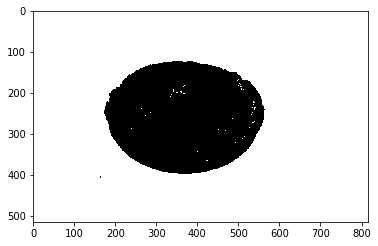

In [85]:
# Define the masked area
#mask1 = cv2.inRange(image_copy, lower_red, upper_red)
#mask2 = cv2.inRange(image_copy, lower_green, upper_green)
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Vizualize the mask
plt.imshow(mask, cmap='gray')
#plt.imshow(mask2, cmap='gray')
#plt.imshow(mask3, cmap='gray')

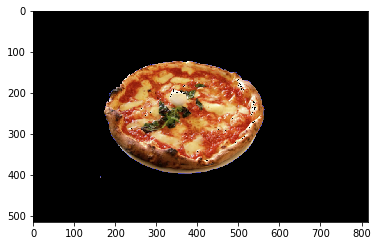

In [86]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

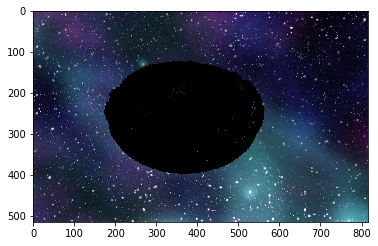

In [87]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/space_background.jpg')
#plt.imshow(background_image)
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
#plt.imshow(background_image)
# Crop it to the right size (514x816)
crop_background = background_image[0:514, 0:816]
#plt.imshow(crop_background)
# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

### Create a complete image

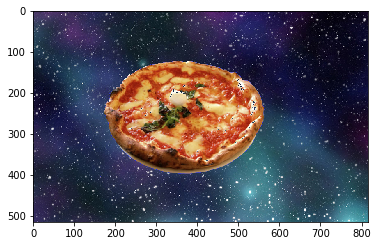

In [88]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)